# Head

In [1]:
import pandas as pd
from pathlib import Path
home = Path.home()

# models = ['qwen3', 'gemma3', 'llama4', 'qwq']
models = ['llama4', 'gemma3', 'qwen3']

suffixes = None
# suffixes = '_sent_shuffle'
# suffixes = '_tail'

if suffixes is not None:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}{suffixes}.txt' for model in models]
else:
    csv_files = [home / f'projects/TLDR/data/paper_html_10.1038/abs_annotation/generated_annotations/{model}.txt' for model in models]

df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/test.tsv', sep='\t')
for model, csv_file in zip(models, csv_files):
    with open(csv_file, encoding='utf-8') as f:
        lines = f.readlines()
        single_df = pd.DataFrame({model: [line.rstrip('\n') for line in lines]})
    print(f"Loaded {model} data with shape: {single_df.shape}")
    df = df.join(single_df)

for index in pd.read_csv(home / "projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    df = df.drop(index-2)  # Adjusting for zero-based index
df

Loaded llama4 data with shape: (35636, 1)
Loaded gemma3 data with shape: (35636, 1)
Loaded qwen3 data with shape: (35636, 1)


,doi,paper_id,abstract,annotation,llama4,gemma3,qwen3
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study suggests that there were two distin...,This study refutes the single origin of domest...,mtDNA analysis reveals ancient divergence betw...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,"This study, among others, provides evidence of...",This study provides evidence for independent d...,This study demonstrates independent pig domest...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,The study describes the fine-mapping approach ...,This study used fine-mapping methods to identi...,This QTL study identifies a 5cM bovine chromos...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study demonstrated that linkage disequili...,Reference 35 reports long-range LD in Dutch bl...,"""Genome-wide analysis of Dutch Black-and-white..."
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,The data reported here constitute a comprehens...,This study identifies a major QTL on SSC4 affe...,Identifies a major QTL on chromosome 4 underly...
...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,These studies suggest that isolation and expan...,This study describes an efficient protocol for...,This study demonstrates that CD4+CD127lo/−CD25...
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that orthogonal IL-2 a...,Reference 48 describes the engineering of a sy...,This work describes engineered synthetic IL-2 ...
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies an important mechanism u...,Reference 51 shows that autoreactive T cells c...,This study identifies autoimmune T cell recogn...
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study presents a comprehensive strategy t...,This work demonstrates that a combined strateg...,This study reports a genome-editing strategy t...


# Load Co-citation (optional)

In [19]:
full_df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/abs_annotation.tsv', sep='\t')
co_citation_df = pd.read_parquet(home / 'projects/TLDR/data/co_citation.parquet')
print(len(co_citation_df))
co_citation_df['annotation'] = full_df['annotation'].tolist()

train_df = pd.read_csv(home / 'projects/TLDR/data/paper_html_10.1038/abs_annotation/train.tsv', sep='\t')
train_annotation = train_df.annotation.tolist()
co_citation_df.drop(co_citation_df[co_citation_df['annotation'].isin(train_annotation)].index, inplace=True) # drop training set entries
co_citation_df.reset_index(drop=True, inplace=True)
for index in pd.read_csv(home / "projects/TLDR/description/invalid_entry_in_test.txt", sep='\t', header=None).values.flatten().tolist():
    co_citation_df = co_citation_df.drop(index-2)  # Adjusting for zero-based index
co_citation_df

35641


,doi,cited_by_doi,annotation
0,10.1073/pnas.91.7.2757,10.1038/35052563,A demonstration that cattle have been domestic...
1,10.1093/genetics/154.4.1785,10.1038/35052563,Evidence is presented for independent domestic...
2,10.1073/pnas.96.16.9252,10.1038/35052563,This paper shows how the identity-by-descent a...
3,10.1101/gr.10.2.220,10.1038/35052563,The pattern of linkage disequilibrium (LD) acr...
4,10.1126/science.8134840,10.1038/35052563,The first paper to show the use of divergent i...
...,...,...,...
35631,10.2337/db08-1168,10.1038/s41573-019-0041-4,This article describes the good manufacturing ...
35632,10.1126/science.aar3246,10.1038/s41573-019-0041-4,This study reports the generation of an orthog...
35633,10.1126/science.aad2791,10.1038/s41573-019-0041-4,This article shows that some diabetogenic T ce...
35634,10.1073/pnas.1902566116,10.1038/s41573-019-0041-4,This article describes the development of gene...


In [20]:
df['cited_by_doi'] = co_citation_df['cited_by_doi'].tolist()
df

,doi,paper_id,abstract,annotation,llama4,gemma3,qwen3,cited_by_doi
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study suggests that there were two distin...,This study refutes the single origin of domest...,mtDNA analysis reveals ancient divergence betw...,10.1038/35052563
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,"This study, among others, provides evidence of...",This study provides evidence for independent d...,This study demonstrates independent pig domest...,10.1038/35052563
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,The study describes the fine-mapping approach ...,This study used fine-mapping methods to identi...,This QTL study identifies a 5cM bovine chromos...,10.1038/35052563
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study demonstrated that linkage disequili...,Reference 35 reports long-range LD in Dutch bl...,"""Genome-wide analysis of Dutch Black-and-white...",10.1038/35052563
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,The data reported here constitute a comprehens...,This study identifies a major QTL on SSC4 affe...,Identifies a major QTL on chromosome 4 underly...,10.1038/35052563
...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,These studies suggest that isolation and expan...,This study describes an efficient protocol for...,This study demonstrates that CD4+CD127lo/−CD25...,10.1038/s41573-019-0041-4
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that orthogonal IL-2 a...,Reference 48 describes the engineering of a sy...,This work describes engineered synthetic IL-2 ...,10.1038/s41573-019-0041-4
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies an important mechanism u...,Reference 51 shows that autoreactive T cells c...,This study identifies autoimmune T cell recogn...,10.1038/s41573-019-0041-4
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study presents a comprehensive strategy t...,This work demonstrates that a combined strateg...,This study reports a genome-editing strategy t...,10.1038/s41573-019-0041-4


In [21]:
df['cited_by_doi'].value_counts()

cited_by_doi
10.1038/nrmicro1149           24
10.1038/s41582-022-00665-2    23
10.1038/nri.2016.4            22
10.1038/nrmicro2714           19
10.1038/nrmicro3215           18
                              ..
10.1038/nrmicro2875            1
10.1038/nrc1711                1
10.1038/s41583-018-0096-y      1
10.1038/s41586-019-1411-0      1
10.1038/nrg3049                1
Name: count, Length: 9498, dtype: int64

# Load publication venue and year from MAG

In [2]:
import pickle
print("Loading doi_mag_pid_dict...")
with open(home / "projects/TLDR/data/doi_mag_pid_dict.pkl", "rb") as f:
    doi_mag_pid_dict = pickle.load(f)
    print("doi_mag_pid_dict loaded.")

df['mag_pid'] = df['doi'].map(doi_mag_pid_dict)
df = df.dropna(subset=['mag_pid'])
df.loc[:, 'mag_pid'] = df['mag_pid'].apply(lambda x: x.split(';')[0] if isinstance(x, str) else x)
df.loc[:, 'mag_pid'] = df['mag_pid'].astype(int)
display(df)

Loading doi_mag_pid_dict...
doi_mag_pid_dict loaded.


,doi,paper_id,abstract,annotation,llama4,gemma3,qwen3,mag_pid
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study suggests that there were two distin...,This study refutes the single origin of domest...,mtDNA analysis reveals ancient divergence betw...,2005395185
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,"This study, among others, provides evidence of...",This study provides evidence for independent d...,This study demonstrates independent pig domest...,2110049233
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,The study describes the fine-mapping approach ...,This study used fine-mapping methods to identi...,This QTL study identifies a 5cM bovine chromos...,2082900742
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study demonstrated that linkage disequili...,Reference 35 reports long-range LD in Dutch bl...,"""Genome-wide analysis of Dutch Black-and-white...",2103106090
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,The data reported here constitute a comprehens...,This study identifies a major QTL on SSC4 affe...,Identifies a major QTL on chromosome 4 underly...,2045457895
...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,These studies suggest that isolation and expan...,This study describes an efficient protocol for...,This study demonstrates that CD4+CD127lo/−CD25...,2137227986
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that orthogonal IL-2 a...,Reference 48 describes the engineering of a sy...,This work describes engineered synthetic IL-2 ...,2789780246
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies an important mechanism u...,Reference 51 shows that autoreactive T cells c...,This study identifies autoimmune T cell recogn...,2266478788
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study presents a comprehensive strategy t...,This work demonstrates that a combined strateg...,This study reports a genome-editing strategy t...,2943378944


In [3]:
MAG_paper_df = pd.read_parquet(home / 'projects/TLDR/data/MAG_paper.parquet')
df = df.merge(MAG_paper_df[['VenueID', 'Year']], left_on='mag_pid', right_index=True, how='inner')
df.rename(columns={'VenueID': 'mag_vid', 'Year': 'year'}, inplace=True)
display(df)

,doi,paper_id,abstract,annotation,llama4,gemma3,qwen3,mag_pid,mag_vid,year
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study suggests that there were two distin...,This study refutes the single origin of domest...,mtDNA analysis reveals ancient divergence betw...,2005395185,125754415,1994
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,"This study, among others, provides evidence of...",This study provides evidence for independent d...,This study demonstrates independent pig domest...,2110049233,65932378,2000
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,The study describes the fine-mapping approach ...,This study used fine-mapping methods to identi...,This QTL study identifies a 5cM bovine chromos...,2082900742,125754415,1999
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study demonstrated that linkage disequili...,Reference 35 reports long-range LD in Dutch bl...,"""Genome-wide analysis of Dutch Black-and-white...",2103106090,43092948,2000
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,The data reported here constitute a comprehens...,This study identifies a major QTL on SSC4 affe...,Identifies a major QTL on chromosome 4 underly...,2045457895,3880285,1994
...,...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,These studies suggest that isolation and expan...,This study describes an efficient protocol for...,This study demonstrates that CD4+CD127lo/−CD25...,2137227986,129060628,2009
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that orthogonal IL-2 a...,Reference 48 describes the engineering of a sy...,This work describes engineered synthetic IL-2 ...,2789780246,3880285,2018
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies an important mechanism u...,Reference 51 shows that autoreactive T cells c...,This study identifies autoimmune T cell recogn...,2266478788,3880285,2016
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study presents a comprehensive strategy t...,This work demonstrates that a combined strateg...,This study reports a genome-editing strategy t...,2943378944,125754415,2019


# Load subject label (optional)

In [5]:
label_df = pd.read_parquet(home / 'projects/TLDR/data/cluster_df.parquet')
df = df.merge(label_df[['kmeans_label', 'Scopus_label']], left_on='mag_vid', right_index=True, how='inner')
df.rename(columns={'kmeans_label': 'p2v_label', 'Scopus_label': 'scopus_label'}, inplace=True)
df

,doi,paper_id,abstract,annotation,llama4,gemma3,qwen3,mag_pid,mag_vid,year,p2v_label,scopus_label
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study suggests that there were two distin...,This study refutes the single origin of domest...,mtDNA analysis reveals ancient divergence betw...,2005395185,125754415,1994,17,Multidisciplinary
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,"This study, among others, provides evidence of...",This study provides evidence for independent d...,This study demonstrates independent pig domest...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology"
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,The study describes the fine-mapping approach ...,This study used fine-mapping methods to identi...,This QTL study identifies a 5cM bovine chromos...,2082900742,125754415,1999,17,Multidisciplinary
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study demonstrated that linkage disequili...,Reference 35 reports long-range LD in Dutch bl...,"""Genome-wide analysis of Dutch Black-and-white...",2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology"
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,The data reported here constitute a comprehens...,This study identifies a major QTL on SSC4 affe...,Identifies a major QTL on chromosome 4 underly...,2045457895,3880285,1994,8,Multidisciplinary
...,...,...,...,...,...,...,...,...,...,...,...,...
35631,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,These studies suggest that isolation and expan...,This study describes an efficient protocol for...,This study demonstrates that CD4+CD127lo/−CD25...,2137227986,129060628,2009,17,Medicine
35632,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that orthogonal IL-2 a...,Reference 48 describes the engineering of a sy...,This work describes engineered synthetic IL-2 ...,2789780246,3880285,2018,8,Multidisciplinary
35633,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies an important mechanism u...,Reference 51 shows that autoreactive T cells c...,This study identifies autoimmune T cell recogn...,2266478788,3880285,2016,8,Multidisciplinary
35634,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study presents a comprehensive strategy t...,This work demonstrates that a combined strateg...,This study reports a genome-editing strategy t...,2943378944,125754415,2019,17,Multidisciplinary


In [7]:
df['p2v_label'].value_counts()

p2v_label
17    18439
8      9625
6      1457
7      1028
4       627
9       611
11      580
22      404
18      363
21      319
12      292
20      121
1        60
3        49
14       32
5        25
24       21
16       21
15       17
23       16
2        16
0        10
19        6
13        5
25        2
Name: count, dtype: int64

In [8]:
df['scopus_label'].value_counts()

scopus_label
Multidisciplinary                               15639
Medicine                                         5262
Immunology and Microbiology                      4146
Biochemistry, Genetics and Molecular Biology     4116
Chemistry                                        1285
Neuroscience                                     1211
Agricultural and Biological Sciences              704
Social Sciences                                   608
Earth and Planetary Sciences                      235
Materials Science                                 179
Psychology                                        156
Physics and Astronomy                             139
Pharmacology, Toxicology and Pharmaceutics        128
Environmental Science                             119
Energy                                             39
Mathematics                                        30
Engineering                                        28
Computer Science                                   24
Nursing        

# Fetch paper titles

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm

from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

MYSQL_HOST = os.getenv('MYSQL_HOST')
MYSQL_USER = os.getenv('MYSQL_USER')
MYSQL_PASS = os.getenv('MYSQL_PASS')
MYSQL_DB = os.getenv('MYSQL_DB')

engine = create_engine(f'mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}/{MYSQL_DB}?charset=utf8mb4')

paper_ids = df['paper_id'].unique().tolist()
BATCH_SIZE = 500

results = []
for i in tqdm(range(0, len(paper_ids), BATCH_SIZE), desc="Querying titles", unit="batch"):
    batch = paper_ids[i:i+BATCH_SIZE]
    id_str = ','.join(str(int(pid)) for pid in batch)
    sql = f"SELECT paper_id, title FROM paper_bib WHERE paper_id IN ({id_str})"
    batch_df = pd.read_sql(sql, engine)
    results.append(batch_df)

paper_title_df = pd.concat(results, ignore_index=True)
display(paper_title_df)

Querying titles:   2%|██▍                                                                                                                                         | 1/57 [00:00<00:05,  9.39batch/s]

Querying titles: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:00<00:00, 71.10batch/s]


,paper_id,title
0,1353153,Efficient Generation of a Hepatitis B Virus Cy...
1,1634910,"Structure of Hjc, a Holliday junction resolvas..."
2,1655469,From Complete Genomes to Measures of Substitut...
3,1778349,Regulation of the Proinflammatory Effects of F...
4,2550721,Differential requirement for p19ARF in the p53...
...,...,...
28005,83433077,Revisiting IL-2: Biology and therapeutic prosp...
28006,104021261,Systems-level analysis of mechanisms regulatin...
28007,104393236,siRNA nanoparticles targeting CaMKIIγ in lesio...
28008,123181209,Immunotherapy of autoimmune encephalomyelitis ...


In [ ]:
paper_title_df.to_parquet(home / 'projects/TLDR/data/paper_title.parquet', index=False)

# Load paper titles

In [5]:
paper_title_df = pd.read_parquet(home / 'projects/TLDR/data/paper_title.parquet')
df = df.merge(paper_title_df, on='paper_id', how='left')
display(df)

,doi,paper_id,abstract,annotation,llama4,gemma3,qwen3,mag_pid,mag_vid,year,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study suggests that there were two distin...,This study refutes the single origin of domest...,mtDNA analysis reveals ancient divergence betw...,2005395185,125754415,1994,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,"This study, among others, provides evidence of...",This study provides evidence for independent d...,This study demonstrates independent pig domest...,2110049233,65932378,2000,The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,The study describes the fine-mapping approach ...,This study used fine-mapping methods to identi...,This QTL study identifies a 5cM bovine chromos...,2082900742,125754415,1999,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study demonstrated that linkage disequili...,Reference 35 reports long-range LD in Dutch bl...,"""Genome-wide analysis of Dutch Black-and-white...",2103106090,43092948,2000,Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,The data reported here constitute a comprehens...,This study identifies a major QTL on SSC4 affe...,Identifies a major QTL on chromosome 4 underly...,2045457895,3880285,1994,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...,...,...,...
34257,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,These studies suggest that isolation and expan...,This study describes an efficient protocol for...,This study demonstrates that CD4+CD127lo/−CD25...,2137227986,129060628,2009,Expansion of Human Regulatory T-Cells From Pat...
34258,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that orthogonal IL-2 a...,Reference 48 describes the engineering of a sy...,This work describes engineered synthetic IL-2 ...,2789780246,3880285,2018,Selective targeting of engineered T cells usin...
34259,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies an important mechanism u...,Reference 51 shows that autoreactive T cells c...,This study identifies autoimmune T cell recogn...,2266478788,3880285,2016,Pathogenic CD4 T cells in type 1 diabetes reco...
34260,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study presents a comprehensive strategy t...,This work demonstrates that a combined strateg...,This study reports a genome-editing strategy t...,2943378944,125754415,2019,Generation of hypoimmunogenic human pluripoten...


In [8]:
df.to_csv(home/"projects/TLDR/data/dataset.csv", index=False)

# BERTTopic

In [ ]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

docs = [f"{title}[SEP]{abs}" for abs, title in zip(df['abstract'].tolist(), df['title'].tolist())]
representation_model = KeyBERTInspired()

topic_model = BERTopic(representation_model=representation_model, verbose=True,
                        n_gram_range=(1, 3),
                        # nr_topics='auto', 
                        )
topics, probs = topic_model.fit_transform(docs)
topic_model.get_topic_info()

2025-07-23 12:03:49,309 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1114 [00:00<?, ?it/s]

2025-07-23 12:04:45,486 - BERTopic - Embedding - Completed ✓
2025-07-23 12:04:45,487 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-23 12:05:05,542 - BERTopic - Dimensionality - Completed ✓
2025-07-23 12:05:05,543 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current p

In [83]:
new_topics = topic_model.reduce_outliers(docs, topics)

100%|████████████████████████████████████████████████████████████████████████████| 11/11 [00:53<00:00,  4.82s/it]


In [84]:
df['BERTopic'] = new_topics
df

,doi,paper_id,abstract,annotation,llama4,gemma3,qwen3,title,BERTopic
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study suggests that there were two distin...,This study refutes the single origin of domest...,mtDNA analysis reveals ancient divergence betw...,Evidence for two independent domestications of...,436
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,"This study, among others, provides evidence of...",This study provides evidence for independent d...,This study demonstrates independent pig domest...,The Origin of the Domestic Pig: Independent Do...,436
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,The study describes the fine-mapping approach ...,This study used fine-mapping methods to identi...,This QTL study identifies a 5cM bovine chromos...,Fine-mapping of quantitative trait loci by ide...,154
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study demonstrated that linkage disequili...,Reference 35 reports long-range LD in Dutch bl...,"""Genome-wide analysis of Dutch Black-and-white...",Extensive Genome-wide Linkage Disequilibrium i...,2
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,The data reported here constitute a comprehens...,This study identifies a major QTL on SSC4 affe...,Identifies a major QTL on chromosome 4 underly...,Genetic mapping of quantitative trait loci for...,154
...,...,...,...,...,...,...,...,...,...
35616,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,These studies suggest that isolation and expan...,This study describes an efficient protocol for...,This study demonstrates that CD4+CD127lo/−CD25...,Expansion of Human Regulatory T-Cells From Pat...,69
35617,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that orthogonal IL-2 a...,Reference 48 describes the engineering of a sy...,This work describes engineered synthetic IL-2 ...,Selective targeting of engineered T cells usin...,170
35618,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies an important mechanism u...,Reference 51 shows that autoreactive T cells c...,This study identifies autoimmune T cell recogn...,Pathogenic CD4 T cells in type 1 diabetes reco...,69
35619,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study presents a comprehensive strategy t...,This work demonstrates that a combined strateg...,This study reports a genome-editing strategy t...,Generation of hypoimmunogenic human pluripoten...,38


# Predict group

In [6]:
df

,doi,paper_id,abstract,annotation,llama4,gemma3,qwen3,mag_pid,mag_vid,year,title
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study suggests that there were two distin...,This study refutes the single origin of domest...,mtDNA analysis reveals ancient divergence betw...,2005395185,125754415,1994,Evidence for two independent domestications of...
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,"This study, among others, provides evidence of...",This study provides evidence for independent d...,This study demonstrates independent pig domest...,2110049233,65932378,2000,The Origin of the Domestic Pig: Independent Do...
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,The study describes the fine-mapping approach ...,This study used fine-mapping methods to identi...,This QTL study identifies a 5cM bovine chromos...,2082900742,125754415,1999,Fine-mapping of quantitative trait loci by ide...
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study demonstrated that linkage disequili...,Reference 35 reports long-range LD in Dutch bl...,"""Genome-wide analysis of Dutch Black-and-white...",2103106090,43092948,2000,Extensive Genome-wide Linkage Disequilibrium i...
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,The data reported here constitute a comprehens...,This study identifies a major QTL on SSC4 affe...,Identifies a major QTL on chromosome 4 underly...,2045457895,3880285,1994,Genetic mapping of quantitative trait loci for...
...,...,...,...,...,...,...,...,...,...,...,...
34257,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,These studies suggest that isolation and expan...,This study describes an efficient protocol for...,This study demonstrates that CD4+CD127lo/−CD25...,2137227986,129060628,2009,Expansion of Human Regulatory T-Cells From Pat...
34258,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that orthogonal IL-2 a...,Reference 48 describes the engineering of a sy...,This work describes engineered synthetic IL-2 ...,2789780246,3880285,2018,Selective targeting of engineered T cells usin...
34259,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies an important mechanism u...,Reference 51 shows that autoreactive T cells c...,This study identifies autoimmune T cell recogn...,2266478788,3880285,2016,Pathogenic CD4 T cells in type 1 diabetes reco...
34260,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study presents a comprehensive strategy t...,This work demonstrates that a combined strateg...,This study reports a genome-editing strategy t...,2943378944,125754415,2019,Generation of hypoimmunogenic human pluripoten...


In [7]:
df_group = df.copy()

## 10-fold cv

### MLP

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

class TorchMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, x):
        return self.net(x).squeeze(-1)

def train_torch_mlp(X_train, y_train, X_val, y_val, hidden_dim=128, lr=1e-3, num_epochs=10, batch_size=128, verbose=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TorchMLP(X_train.shape[1], hidden_dim=hidden_dim).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)
    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            idx = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[idx], y_train_tensor[idx]
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
        if verbose:
            model.eval()
            with torch.no_grad():
                val_logits = model(X_val_tensor)
                val_loss = criterion(val_logits, y_val_tensor)
                preds = (torch.sigmoid(val_logits) > 0.5).cpu().numpy()
                f1 = f1_score(y_val, preds, zero_division=0)
                print(f"        Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val F1: {f1:.4f}")
    if verbose:
        print("\n")
    return model

def eval_torch_mlp(model, X, y):
    device = next(model.parameters()).device
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = (torch.sigmoid(logits) > 0.5).cpu().numpy()
    return {
        'f1': f1_score(y, preds, zero_division=0),
        'accuracy': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0)
    }

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sentence_transformers import SentenceTransformer
SBERT = SentenceTransformer('all-MiniLM-L6-v2')

def sample_pairs(df, n_pairs, rng, label_col='p2v_label', id_col='paper_id'):
    """
    从df中采样n_pairs个正样本（同类不同paper）和n_pairs个负样本（异类不同paper），所有pair唯一（顺序无关）。
    允许同一paper多次被抽中参与不同pair。
    """
    # 计算最大可采样的positive/negative pair数目
    groups = {k: v for k, v in df.groupby(label_col)}
    # 最大正例数：每个类别内选2的组合数
    max_pos_pairs = sum(len(g) * (len(g) - 1) // 2 for g in groups.values() if len(g) >= 2)
    # 最大负例数：所有不同类别对，两类别分别随便取一个，去重
    labels = list(groups.keys())
    max_neg_pairs = 0
    for i in range(len(labels)):
        for j in range(i+1, len(labels)):
            max_neg_pairs += len(groups[labels[i]]) * len(groups[labels[j]])
    print(f"Max positive pairs: {max_pos_pairs}, Max negative pairs: {max_neg_pairs}")
    if n_pairs > max_pos_pairs or n_pairs > max_neg_pairs:
        raise ValueError(f"n_pairs={n_pairs} exceeds maximum possible pairs: pos={max_pos_pairs}, neg={max_neg_pairs}")

    # 正样本采样
    pos_set = set()
    pos_pairs = []
    valid_labels = [k for k, v in groups.items() if v.shape[0] >= 2]
    idx_map = df.reset_index().set_index(id_col)['index'].to_dict()  # paper_id -> 行号

    while len(pos_pairs) < n_pairs:
        label = rng.choice(valid_labels)
        group_df = groups[label]
        id1, id2 = rng.choice(group_df[id_col], 2, replace=False)
        pair = tuple(sorted((id1, id2)))
        if pair not in pos_set:
            pos_set.add(pair)
            pos_pairs.append((idx_map[id1], idx_map[id2]))

    # 负样本采样
    neg_set = set()
    neg_pairs = []
    labels = df[label_col].unique()
    while len(neg_pairs) < n_pairs:
        label1, label2 = rng.choice(labels, 2, replace=False)
        df1 = df[df[label_col] == label1]
        df2 = df[df[label_col] == label2]
        id1 = rng.choice(df1[id_col])
        id2 = rng.choice(df2[id_col])
        pair = tuple(sorted((id1, id2)))
        if pair not in pos_set and pair not in neg_set:
            neg_set.add(pair)
            neg_pairs.append((idx_map[id1], idx_map[id2]))
    return pos_pairs, neg_pairs

rng = np.random.default_rng(42)
n_pairs = 10000
label_col = 'cited_by_doi'
id_col = 'paper_id'
paper_ids = df[id_col].unique()
gkf = GroupKFold(n_splits=10)

results = []
for fold_id, (train_paper_idx, test_paper_idx) in enumerate(gkf.split(paper_ids, np.zeros(len(paper_ids)), groups=paper_ids)):
    print(f"\nFold {fold_id+1}")
    # get paper_id for current fold
    test_papers = paper_ids[test_paper_idx]
    train_papers = paper_ids[train_paper_idx]
    df_train = df[df[id_col].isin(train_papers)].reset_index(drop=True)
    df_test = df[df[id_col].isin(test_papers)].reset_index(drop=True)
    print(f"  Train papers: {len(train_papers)}, Test papers: {len(test_papers)}")
    # sampling in current fold
    pos_train, neg_train = sample_pairs(df_train, n_pairs, rng, label_col, id_col)
    pos_test, neg_test = sample_pairs(df_test, n_pairs//20, rng, label_col, id_col)  # don't need too many samples in test set
    print(f"  Sampling results on train set: Positive pairs: {len(pos_train)}, Negative pairs: {len(neg_train)}")
    print(f"  Sampling results on test set: Positive pairs: {len(pos_test)}, Negative pairs: {len(neg_test)}")
    train_pairs = [{'idx1': i1, 'idx2': i2, 'label': 1} for i1, i2 in pos_train] + \
                    [{'idx1': i1, 'idx2': i2, 'label': 0} for i1, i2 in neg_train]
    test_pairs = [{'idx1': i1, 'idx2': i2, 'label': 1} for i1, i2 in pos_test] + \
                    [{'idx1': i1, 'idx2': i2, 'label': 0} for i1, i2 in neg_test]
    train_pairs_df = pd.DataFrame(train_pairs)
    test_pairs_df = pd.DataFrame(test_pairs)
    for feat in ['abstract', 'annotation']+models:
        print(f"    Feature: {feat}")
        X_train = df_train[feat].astype(str).fillna('').tolist()
        X_test = df_test[feat].astype(str).fillna('').tolist()
        y_train = train_pairs_df['label'].values
        y_test = test_pairs_df['label'].values
        txt1_train = [X_train[j] for j in train_pairs_df['idx1']]
        txt2_train = [X_train[j] for j in train_pairs_df['idx2']]
        txt1_test = [X_test[j] for j in test_pairs_df['idx1']]
        txt2_test = [X_test[j] for j in test_pairs_df['idx2']]
        vec1_train = SBERT.encode(txt1_train, convert_to_tensor=True, show_progress_bar=False).cpu().numpy()
        vec2_train = SBERT.encode(txt2_train, convert_to_tensor=True, show_progress_bar=False).cpu().numpy()
        vec1_test = SBERT.encode(txt1_test, convert_to_tensor=True, show_progress_bar=False).cpu().numpy()
        vec2_test = SBERT.encode(txt2_test, convert_to_tensor=True, show_progress_bar=False).cpu().numpy()
        X_train_emb = np.concatenate([vec1_train, vec2_train], axis=1)
        X_test_emb = np.concatenate([vec1_test, vec2_test], axis=1)
        model = train_torch_mlp(X_train_emb, y_train, X_test_emb, y_test, num_epochs=10, verbose=False)
        metrics = eval_torch_mlp(model, X_test_emb, y_test)
        result = {
            'fold': fold_id + 1,
            'feature': feat,
            'f1': metrics['f1'],
            'accuracy': metrics['accuracy'],
            'precision': metrics['precision'],
            'recall': metrics['recall'],
        }
        results.append(result)
        print(f"      F1={metrics['f1']:.4f}")
metrics_group_df = pd.DataFrame(results)


Fold 1
  Train papers: 26405, Test papers: 2934
Max positive pairs: 63393, Max negative pairs: 515286067
Max positive pairs: 736, Max negative pairs: 6178634
  Sampling results on train set: Positive pairs: 10000, Negative pairs: 10000
  Sampling results on test set: Positive pairs: 500, Negative pairs: 500
    Feature: abstract
      F1=0.8602
    Feature: annotation
      F1=0.7864
    Feature: llama4
      F1=0.8340
    Feature: gemma3
      F1=0.8325
    Feature: qwen3
      F1=0.8412

Fold 2
  Train papers: 26405, Test papers: 2934
Max positive pairs: 63288, Max negative pairs: 511920712
Max positive pairs: 690, Max negative pairs: 6553320
  Sampling results on train set: Positive pairs: 10000, Negative pairs: 10000
  Sampling results on test set: Positive pairs: 500, Negative pairs: 500
    Feature: abstract
      F1=0.8735
    Feature: annotation
      F1=0.7867
    Feature: llama4
      F1=0.8325
    Feature: gemma3
      F1=0.8288
    Feature: qwen3
      F1=0.8557

Fold 3
  

#### Save

In [25]:
metrics_group_df.to_parquet(home / 'projects/TLDR/evaluation/predict_task/metrics_group_co_annotated_df.parquet', index=False)

### Random Forest

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import itertools
import warnings
from tqdm import tqdm

def train_rf(X_train, y_train, X_val=None, y_val=None, n_estimators=100, max_depth=None, random_state=42):
    model = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        random_state=random_state,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    return model

def eval_rf(model, X, y):
    preds = model.predict(X)
    return {
        'f1': f1_score(y, preds, zero_division=0),
        'accuracy': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0)
    }

def sample_pairs(df_q, n_pairs, rng):
    """
    - 正样本：随机选择一个有效类别，从该类别中选两个不同paper组成pair
    - 负样本：随机选择一个类别，选择一个paper，再从其他类别中选择一个paper组成pair
    
    参数:
        df_q: 包含数据的DataFrame
        n_pairs: 需要采样的正负样本对数量
        rng: 随机数生成器
        
    返回:
        pos_pairs, neg_pairs: 正样本对和负样本对的列表
    """
    label_groups = {k: v.index.tolist() for k, v in df_q.groupby('p2v_label')} # 按标签分组
    valid_labels = [lbl for lbl, idxs in label_groups.items() if len(idxs) >= 2]  # 找出有效标签（至少有2个样本）
    if not valid_labels:
        raise ValueError("没有找到包含至少2个样本的有效标签")
    all_pairs = set() # 用于跟踪所有生成的对（无论正负）以避免重复
    
    # 生成正样本对
    pos_pairs = []
    attempts_pos = 0
    max_attempts_pos = n_pairs * 10  # 避免无限循
    while len(pos_pairs) < n_pairs and attempts_pos < max_attempts_pos:
        attempts_pos += 1
        # 1. 随机选择一个有效标签
        label = rng.choice(valid_labels)
        papers = label_groups[label]
        if len(papers) < 2:
            continue
        # 2. 从该标签的papers中选择两个不同的paper
        idx1, idx2 = rng.choice(papers, 2, replace=False)
        pair = (min(idx1, idx2), max(idx1, idx2))  # 确保顺序一致性
        # 3. 检查是否重复
        if pair not in all_pairs:
            pos_pairs.append(pair)
            all_pairs.add(pair)
    if len(pos_pairs) < n_pairs:
        warnings.warn(f"只能生成 {len(pos_pairs)}/{n_pairs} 个正样本对")
    
    # 生成负样本对
    neg_pairs = []
    attempts_neg = 0
    max_attempts_neg = n_pairs * 10  # 避免无限循环
    # 创建一个反向映射，用于快速检查索引属于哪个标签
    index_to_label = {}
    for label, indices in label_groups.items():
        for idx in indices:
            index_to_label[idx] = label
    
    while len(neg_pairs) < n_pairs and attempts_neg < max_attempts_neg:
        attempts_neg += 1
        # 1. 随机选择一个标签
        label1 = rng.choice(list(label_groups.keys()))
        if not label_groups[label1]:  # 如果该标签没有样本，跳过
            continue
        # 2. 从该标签中选择一个paper
        idx1 = rng.choice(label_groups[label1])
        # 3. 构建不属于该标签的papers列表
        other_papers = [idx for idx in df_q.index if index_to_label.get(idx) != label1]
        if not other_papers:  # 如果没有其他标签的paper，跳过
            continue
        # 4. 从其他标签的papers中选择一个
        idx2 = rng.choice(other_papers)
        # 确保顺序一致性并检查重复
        pair = (min(idx1, idx2), max(idx1, idx2))
        if pair not in all_pairs:
            neg_pairs.append(pair)
            all_pairs.add(pair)
    if len(neg_pairs) < n_pairs:
        warnings.warn(f"只能生成 {len(neg_pairs)}/{n_pairs} 个负样本对")
        
    return pos_pairs, neg_pairs

metrics_sub_rf_df = pd.DataFrame(columns=[
    'feature', 
    'accuracy_mean', 'accuracy_std',
    'precision_mean', 'precision_std', 
    'recall_mean', 'recall_std',
    'f1_mean', 'f1_std',
])

PAIR_SAMPLE_SIZE = 50000
rng = np.random.default_rng(42)

df_sub = df.reset_index(drop=True)
pos_pairs, neg_pairs = sample_pairs(df_sub, PAIR_SAMPLE_SIZE, rng)
print(f"Sampled {len(pos_pairs)} positive pairs and {len(neg_pairs)} negative pairs.")
pair_samples = (
    [{'idx1': idx1, 'idx2': idx2, 'label': 1} for idx1, idx2 in pos_pairs] +
    [{'idx1': idx1, 'idx2': idx2, 'label': 0} for idx1, idx2 in neg_pairs]
)
pair_samples_df = pd.DataFrame(pair_samples)
metrics_list = []
for feat in ['abstract', 'annotation'] + models:
    X = df_sub[feat].astype(str).fillna('').tolist()
    y = pair_samples_df['label'].values
    txt1_list = [X[row['idx1']] for _, row in pair_samples_df.iterrows()]
    txt2_list = [X[row['idx2']] for _, row in pair_samples_df.iterrows()]
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    fold_metrics = []
    for fold_idx, (train_idx, test_idx) in tqdm(enumerate(cv.split(np.zeros(len(y)), y)), total=cv.get_n_splits(), unit='folds', desc=f"Processing {feat}"):
        txt1_train = [txt1_list[j] for j in train_idx]
        txt2_train = [txt2_list[j] for j in train_idx]
        txt1_test = [txt1_list[j] for j in test_idx]
        txt2_test = [txt2_list[j] for j in test_idx]

        vectorizer1 = TfidfVectorizer(max_features=1000, stop_words='english')
        vectorizer2 = TfidfVectorizer(max_features=1000, stop_words='english')
        vec1_train = vectorizer1.fit_transform(txt1_train).toarray()
        vec2_train = vectorizer2.fit_transform(txt2_train).toarray()
        vec1_test = vectorizer1.transform(txt1_test).toarray()
        vec2_test = vectorizer2.transform(txt2_test).toarray()
        X_train = np.concatenate([vec1_train, vec2_train], axis=1)
        X_test = np.concatenate([vec1_test, vec2_test], axis=1)
        y_train = y[train_idx]
        y_test = y[test_idx]
        model = train_rf(X_train, y_train)
        metrics = eval_rf(model, X_test, y_test)
        fold_metrics.append(metrics)
    print(f"Mean F1 score for {feat}: {np.mean([m['f1'] for m in fold_metrics])}")
    print(f"Standard deviation of F1 score for {feat}: {np.std([m['f1'] for m in fold_metrics])}")

    metrics_10_fold = pd.DataFrame(fold_metrics)
    metrics_list.append({
            'feature': feat,
            'accuracy_mean': metrics_10_fold['accuracy'].mean(),
            'accuracy_std': metrics_10_fold['accuracy'].std(),
            'precision_mean': metrics_10_fold['precision'].mean(),
            'precision_std': metrics_10_fold['precision'].std(),
            'recall_mean': metrics_10_fold['recall'].mean(),
            'recall_std': metrics_10_fold['recall'].std(),
            'f1_mean': metrics_10_fold['f1'].mean(),
            'f1_std': metrics_10_fold['f1'].std(),
        })

metrics_sub_rf_df = pd.DataFrame(metrics_list)
display(metrics_sub_rf_df)

Sampled 50000 positive pairs and 50000 negative pairs.


Processing abstract: 100%|████████████████████████████████████████████████████| 10/10 [06:44<00:00, 40.46s/folds]


Mean F1 score for abstract: 0.8161087384899821
Standard deviation of F1 score for abstract: 0.0021796016831171377


Processing annotation: 100%|██████████████████████████████████████████████████| 10/10 [16:19<00:00, 97.99s/folds]


Mean F1 score for annotation: 0.7564619788696854
Standard deviation of F1 score for annotation: 0.0030526302952691192


Processing llama4: 100%|██████████████████████████████████████████████████████| 10/10 [10:40<00:00, 64.07s/folds]


Mean F1 score for llama4: 0.7648571036750678
Standard deviation of F1 score for llama4: 0.004206406929728308


Processing gemma3: 100%|██████████████████████████████████████████████████████| 10/10 [11:10<00:00, 67.05s/folds]


Mean F1 score for gemma3: 0.7607854115159545
Standard deviation of F1 score for gemma3: 0.003514790498041124


Processing qwen3: 100%|███████████████████████████████████████████████████████| 10/10 [09:17<00:00, 55.78s/folds]

Mean F1 score for qwen3: 0.7672039484536687
Standard deviation of F1 score for qwen3: 0.003412081917015663


,feature,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,abstract,0.81202,0.002317,0.798741,0.002836,0.83426,0.003591,0.816109,0.002298
1,annotation,0.73983,0.003537,0.711015,0.003379,0.80812,0.003562,0.756462,0.003218
2,llama4,0.75045,0.004798,0.723128,0.004941,0.81172,0.005755,0.764857,0.004434
3,gemma3,0.74473,0.004254,0.715797,0.004818,0.81184,0.005267,0.760785,0.003705
4,qwen3,0.75356,0.003365,0.726946,0.002791,0.81220,0.006007,0.767204,0.003597


In [ ]:
metrics_sub_rf_df.to_parquet(home / 'projects/TLDR/evaluation/predict_task/metrics_sub_rf_df.parquet')

# Predict year (deprecated)

In [19]:
df['year'].describe()

count    34146.000000
mean      2006.680724
std          9.105688
min       1887.000000
25%       2001.000000
50%       2007.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64

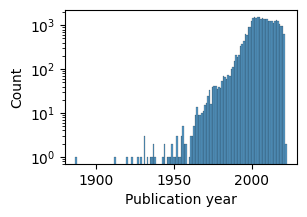

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2))
sns.histplot(df, x='year', stat='count', discrete=True)
plt.xlabel('Publication year')
plt.yscale('log')
plt.ylabel('Count')
plt.show()

## 10-fold cv

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

# 指标: Accuracy, Precision, Recall, F1
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
text_features = models + ['annotation', 'abstract']
y = (df['year'] >= 2008).astype(int)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    vectorizer = ProgressHashingVectorizer(n_features=2**20, stop_words='english', alternate_sign=False)
    X = vectorizer.transform(X_text)
    model = MultinomialNB()
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=1, return_train_score=False)
    res = {
        'feature': feat,
        'Accuracy_mean': scores['test_Accuracy'].mean(),
        'Accuracy_std': scores['test_Accuracy'].std(),
        'Precision_mean': scores['test_Precision'].mean(),
        'Precision_std': scores['test_Precision'].std(),
        'Recall_mean': scores['test_Recall'].mean(),
        'Recall_std': scores['test_Recall'].std(),
        'F1_mean': scores['test_F1'].mean(),
        'F1_std': scores['test_F1'].std(),
    }
    print(
        f"Feature: {feat} | "
        f"Accuracy: {res['Accuracy_mean']:.4f}±{res['Accuracy_std']:.4f} | "
        f"F1: {res['F1_mean']:.4f}±{res['F1_std']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
display(results_df)

Processing feature: gemma3


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 92636.79it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: gemma3 | Accuracy: 0.7034±0.0107 | F1: 0.6410±0.0132
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 69396.27it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Feature: llama4 | Accuracy: 0.6996±0.0097 | F1: 0.6523±0.0123
Processing feature: annotation


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:00<00:00, 98025.04it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: annotation | Accuracy: 0.7161±0.0090 | F1: 0.6678±0.0120
Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 34146/34146 [00:02<00:00, 17072.95it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 256 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.7s finished


Feature: abstract | Accuracy: 0.7542±0.0080 | F1: 0.7063±0.0094


,feature,Accuracy_mean,Accuracy_std,Precision_mean,Precision_std,Recall_mean,Recall_std,F1_mean,F1_std
0,gemma3,0.703363,0.010745,0.772565,0.011581,0.547967,0.017215,0.641009,0.013182
1,llama4,0.699643,0.009672,0.740794,0.014305,0.582821,0.015186,0.652260,0.012288
2,annotation,0.716131,0.009039,0.768938,0.013663,0.590483,0.016425,0.667834,0.011960
3,abstract,0.754203,0.008020,0.836492,0.011048,0.611367,0.014414,0.706276,0.009402


## no cv

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

class ProgressHashingVectorizer(HashingVectorizer):
    """带进度条的HashingVectorizer"""
    def transform(self, X):
        if hasattr(X, '__len__'):
            self.n_samples_ = len(X)
            wrapped_X = tqdm(X, desc="Vectorizing documents", total=self.n_samples_)
            return super().transform(wrapped_X)
        return super().transform(X)

text_features = ['abstract', 'annotation', 'deepseek_v3', 'gemma3', 'llama4', 'qwq']
y = df['year'].astype(int)  # 年份作为连续变量回归

results = []
for feat in text_features:
    print(f"Processing feature: {feat}")
    X_text = df[feat].astype(str).fillna('')
    X_train, X_test, y_train, y_test = train_test_split(
        X_text, y, test_size=0.1, random_state=42
    )

    vectorizer = ProgressHashingVectorizer(n_features=2**18, stop_words='english', alternate_sign=False)
    X_train_vec = vectorizer.transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    model = Ridge(alpha=1.0)
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    res = {
        'feature': feat,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
    }
    print(
        f"Feature: {feat} | "
        f"MAE: {res['MAE']:.4f} | "
        f"R2: {res['R2']:.4f}"
    )
    results.append(res)

results_df = pd.DataFrame(results)
results_df

Processing feature: abstract


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 22020.20it/s]


Feature: abstract | MAE: 4.2865 | R2: 0.5755
Processing feature: annotation


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 130228.28it/s]


Feature: annotation | MAE: 5.5461 | R2: 0.3061
Processing feature: deepseek_v3


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 77554.96it/s]


Feature: deepseek_v3 | MAE: 5.0521 | R2: 0.4281
Processing feature: gemma3


Vectorizing documents: 100%|████████████████████████████████████████████| 3415/3415 [00:00<00:00, 120217.45it/s]


Feature: gemma3 | MAE: 5.5035 | R2: 0.3244
Processing feature: llama4


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 54197.36it/s]


Feature: llama4 | MAE: 5.5231 | R2: 0.3139
Processing feature: qwq


Vectorizing documents: 100%|█████████████████████████████████████████████| 3415/3415 [00:00<00:00, 44297.08it/s]


Feature: qwq | MAE: 5.0755 | R2: 0.4131


,feature,MAE,MSE,R2
0,abstract,4.286524,34.042876,0.575475
1,annotation,5.546063,55.646234,0.306074
2,deepseek_v3,5.052078,45.857851,0.428139
3,gemma3,5.503463,54.177417,0.324391
4,llama4,5.523119,55.020432,0.313878
5,qwq,5.075490,47.060866,0.413137


# Match title

In [18]:
print(df.title.isna().sum())
print(df.abstract.isna().sum())
df_title = df[~(df.title.isna() | df.abstract.isna())]
len(df_title)

16
0


34130

## Generate negative samples

In [20]:
import pandas as pd
import numpy as np
from tqdm import tqdm

pos_df = df_title
pos_df['title_paired'] = True # mark positive samples
neg_samples = [] # Collect negative samples
rng = np.random.default_rng(42)

for idx, row in tqdm(pos_df.iterrows(), total=len(pos_df), desc="Generating negative samples"):
    # Find candidates with the same subject label but different paper_id
    candidates = pos_df[(pos_df['mag_vid'] == row['mag_vid']) & (pos_df['paper_id'] != row['paper_id'])]
    if candidates.empty:
        candidates = pos_df[pos_df['paper_id'] != row['paper_id']]
    neg_title = rng.choice(candidates['title'].values)
    neg_row = row.copy()
    neg_row['title'] = neg_title
    neg_row['title_paired'] = False
    neg_samples.append(neg_row)

neg_df = pd.DataFrame(neg_samples)

title_match_df = pd.concat([pos_df, neg_df], ignore_index=True) # Combine positive and negative samples

/tmp/ipykernel_200642/2745812735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_df['title_paired'] = True # mark positive samples
Generating negative samples: 100%|███████████████████████████████████████| 34130/34130 [00:33<00:00, 1012.06it/s]


In [21]:
title_match_df[title_match_df['title_paired'] == False]['title'].sample(5).tolist()

['Regulatory elements in eIF1A control the fidelity of start codon selection by modulating tRNAiMet binding to the ribosome',
 'Much of late life cognitive decline is not due to common neurodegenerative pathologies: Cognitive Decline',
 'Heterogeneity of meningeal B cells reveals a lymphopoietic niche at the CNS borders',
 'Escape from nonsense-mediated decay associates with anti-tumor immunogenicity',
 'A functionally specialized population of mucosal CD103+ DCs induces Foxp3+ regulatory T cells via a TGF-β– and retinoic acid–dependent mechanism']

In [22]:
title_match_df

,doi,paper_id,abstract,annotation,llama4,gemma3,qwen3,mag_pid,mag_vid,year,p2v_label,scopus_label,title,title_paired
0,10.1073/pnas.91.7.2757,107202074,The origin and taxonomic status of domesticate...,A demonstration that cattle have been domestic...,This study suggests that there were two distin...,This study refutes the single origin of domest...,mtDNA analysis reveals ancient divergence betw...,2005395185,125754415,1994,17,Multidisciplinary,Evidence for two independent domestications of...,True
1,10.1093/genetics/154.4.1785,83366887,Abstract The domestic pig originates from the ...,Evidence is presented for independent domestic...,"This study, among others, provides evidence of...",This study provides evidence for independent d...,This study demonstrates independent pig domest...,2110049233,65932378,2000,17,"Biochemistry, Genetics and Molecular Biology",The Origin of the Domestic Pig: Independent Do...,True
2,10.1073/pnas.96.16.9252,122095374,We previously mapped a quantitative trait locu...,This paper shows how the identity-by-descent a...,The study describes the fine-mapping approach ...,This study used fine-mapping methods to identi...,This QTL study identifies a 5cM bovine chromos...,2082900742,125754415,1999,17,Multidisciplinary,Fine-mapping of quantitative trait loci by ide...,True
3,10.1101/gr.10.2.220,100831446,A genome-wide linkage disequilibrium (LD) map ...,The pattern of linkage disequilibrium (LD) acr...,This study demonstrated that linkage disequili...,Reference 35 reports long-range LD in Dutch bl...,"""Genome-wide analysis of Dutch Black-and-white...",2103106090,43092948,2000,17,"Biochemistry, Genetics and Molecular Biology",Extensive Genome-wide Linkage Disequilibrium i...,True
4,10.1126/science.8134840,17452622,The European wild boar was crossed with the do...,The first paper to show the use of divergent i...,The data reported here constitute a comprehens...,This study identifies a major QTL on SSC4 affe...,Identifies a major QTL on chromosome 4 underly...,2045457895,3880285,1994,8,Multidisciplinary,Genetic mapping of quantitative trait loci for...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68255,10.2337/db08-1168,4860455,OBJECTIVE—Regulatory T-cells (Tregs) have cata...,This article describes the good manufacturing ...,These studies suggest that isolation and expan...,This study describes an efficient protocol for...,This study demonstrates that CD4+CD127lo/−CD25...,2137227986,129060628,2009,17,Medicine,Shift to Fatty Substrate Utilization in Respon...,False
68256,10.1126/science.aar3246,4860145,Engineering cytokine-receptor pairs Interleuki...,This study reports the generation of an orthog...,This study demonstrates that orthogonal IL-2 a...,Reference 48 describes the engineering of a sy...,This work describes engineered synthetic IL-2 ...,2789780246,3880285,2018,8,Multidisciplinary,Shadow Enhancers as a Source of Evolutionary N...,False
68257,10.1126/science.aad2791,62290395,T cells target peptide combos One of the endur...,This article shows that some diabetogenic T ce...,This study identifies an important mechanism u...,Reference 51 shows that autoreactive T cells c...,This study identifies autoimmune T cell recogn...,2266478788,3880285,2016,8,Multidisciplinary,On the nature of a defect in cells from indivi...,False
68258,10.1073/pnas.1902566116,82979762,Polymorphic HLAs form the primary immune barri...,This article describes the development of gene...,This study presents a comprehensive strategy t...,This work demonstrates that a combined strateg...,This study reports a genome-editing strategy t...,2943378944,125754415,2019,17,Multidisciplinary,Cluster analysis and display of genome-wide ex...,False


## 10-CV

#### MLP

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class TorchMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1)
        )
    def forward(self, x):
        return self.net(x).squeeze(-1)

def train_torch_mlp(X_train, y_train, X_val, y_val, hidden_dim=128, lr=1e-3, num_epochs=10, batch_size=128):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = TorchMLP(X_train.shape[1], hidden_dim=hidden_dim).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)
    for epoch in range(num_epochs):
        model.train()
        permutation = torch.randperm(X_train_tensor.size(0))
        for i in range(0, X_train_tensor.size(0), batch_size):
            idx = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[idx], y_train_tensor[idx]
            optimizer.zero_grad()
            logits = model(batch_x)
            loss = criterion(logits, batch_y)
            loss.backward()
            optimizer.step()
    return model

def eval_torch_mlp(model, X, y):
    device = next(model.parameters()).device
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        preds = (torch.sigmoid(logits) > 0.5).cpu().numpy()
    return {
        'f1': f1_score(y, preds, zero_division=0),
        'accuracy': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0)
    }

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedGroupKFold
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
SBERT = SentenceTransformer('all-MiniLM-L6-v2')

def run_one_fold(X_title_emb, X_content_emb, y, train_idx, test_idx, max_features=None):
    X_title_train_emb, X_title_test_emb = X_title_emb[train_idx], X_title_emb[test_idx]
    X_content_train_emb, X_content_test_emb = X_content_emb[train_idx], X_content_emb[test_idx]
    X_train_emb = np.concatenate([X_title_train_emb, X_content_train_emb], axis=1)
    X_test_emb = np.concatenate([X_title_test_emb, X_content_test_emb], axis=1)
    y_train, y_test = y[train_idx], y[test_idx]
    model = train_torch_mlp(X_train_emb, y_train, X_test_emb, y_test, num_epochs=10)
    metrics = eval_torch_mlp(model, X_test_emb, y_test)
    return metrics

X_title = title_match_df['title'].astype(str).fillna('').values
X_title_emb = SBERT.encode(X_title, show_progress_bar=False, convert_to_tensor=True).cpu().numpy()
y = title_match_df['title_paired'].astype(int).values
groups = title_match_df['paper_id'].values
cv = StratifiedGroupKFold(n_splits=10, shuffle=True, random_state=42)
folds = list(cv.split(np.zeros_like(y), y, groups=groups))

results = []
text_features = ['annotation', 'abstract'] + models
for feat in text_features:
    print(f"\nProcessing feature: {feat}")
    X_content = title_match_df[feat].astype(str).fillna('').values
    X_content_emb = SBERT.encode(X_content, show_progress_bar=False, convert_to_tensor=True).cpu().numpy()
    for fold_idx, (train_idx, test_idx) in enumerate(folds):
        metrics = run_one_fold(X_title_emb, X_content_emb, y, train_idx, test_idx)
        res = {
            'feature': feat,
            'fold': fold_idx + 1,
            'accuracy':metrics['accuracy'],
            'precision':metrics['precision'],
            'recall':metrics['recall'],
            'f1':metrics['f1'],
        }
        results.append(res)
    acc_mean = np.mean([res['accuracy'] for res in results])
    acc_std = np.std([res['accuracy'] for res in results])
    precision_mean = np.mean([res['precision'] for res in results])
    precision_std = np.std([res['precision'] for res in results])
    recall_mean = np.mean([res['recall'] for res in results])
    recall_std = np.std([res['recall'] for res in results])
    f1_mean = np.mean([res['f1'] for res in results])
    f1_std = np.std([res['f1'] for res in results])
    print(f"  {feat} - Accuracy: {acc_mean:.4f}±{acc_std:.4f}, "
          f"Precision: {precision_mean:.4f}±{precision_std:.4f}, "
          f"Recall: {recall_mean:.4f}±{recall_std:.4f}, "
          f"F1: {f1_mean:.4f}±{f1_std:.4f}")
metrics_title_df = pd.DataFrame(results)


Processing feature: annotation
  annotation - Accuracy: 0.8883±0.0034, Precision: 0.8823±0.0118, Recall: 0.8965±0.0097, F1: 0.8892±0.0026

Processing feature: abstract
  abstract - Accuracy: 0.9175±0.0295, Precision: 0.9101±0.0295, Recall: 0.9268±0.0313, F1: 0.9183±0.0293

Processing feature: llama4
  llama4 - Accuracy: 0.9163±0.0244, Precision: 0.9096±0.0250, Recall: 0.9247±0.0260, F1: 0.9170±0.0241

Processing feature: gemma3
  gemma3 - Accuracy: 0.9201±0.0222, Precision: 0.9131±0.0227, Recall: 0.9287±0.0237, F1: 0.9208±0.0220

Processing feature: qwen3
  qwen3 - Accuracy: 0.9240±0.0214, Precision: 0.9176±0.0224, Recall: 0.9317±0.0222, F1: 0.9246±0.0211


In [26]:
metrics_title_df.to_parquet(home / 'projects/TLDR/evaluation/predict_task/metrics_title_df.parquet', index=False)

#### Random Forest

In [16]:
from sklearnex import patch_sklearn 
patch_sklearn()

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

def create_tfidf_features(X_title_train, X_content_train, X_title_test, X_content_test, max_features=1000):
    tfidf_title = TfidfVectorizer(max_features=max_features, stop_words='english')
    tfidf_content = TfidfVectorizer(max_features=max_features, stop_words='english')
    # fit only on the training set
    X_title_train_vec = tfidf_title.fit_transform(X_title_train).toarray()
    X_content_train_vec = tfidf_content.fit_transform(X_content_train).toarray()
    X_title_test_vec = tfidf_title.transform(X_title_test).toarray()
    X_content_test_vec = tfidf_content.transform(X_content_test).toarray()
    # Fit and transform title and content separately, adding the diff
    X_train_feat = np.concatenate([X_title_train_vec, X_content_train_vec], axis=1)
    X_test_feat = np.concatenate([X_title_test_vec, X_content_test_vec], axis=1)
    return X_train_feat, X_test_feat

def train_rf(X_train, y_train, X_val=None, y_val=None, n_estimators=100, max_depth=None, random_state=42):
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=random_state,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    return model

def eval_rf(model, X, y):
    preds = model.predict(X)
    return {
        'f1': f1_score(y, preds, zero_division=0),
        'accuracy': accuracy_score(y, preds),
        'precision': precision_score(y, preds, zero_division=0),
        'recall': recall_score(y, preds, zero_division=0)
    }

def run_one_fold(X_title, X_content, y, train_idx, test_idx, max_features=1000):
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)

    X_title_train, X_title_test = X_title[train_idx].tolist(), X_title[test_idx].tolist()
    X_content_train, X_content_test = X_content[train_idx].tolist(), X_content[test_idx].tolist()
    y_train, y_test = y[train_idx], y[test_idx]
    X_train_feat, X_test_feat = create_tfidf_features(X_title_train, X_content_train, X_title_test, X_content_test, max_features=max_features)
    model = train_rf(X_train_feat, y_train)
    metrics = eval_rf(model, X_test_feat, y_test)
    return {
        'accuracy': metrics['accuracy'],
        'precision': metrics['precision'],
        'recall': metrics['recall'],
        'f1': metrics['f1']
    }

y = title_match_df['title_paired'].astype(int).values
X_title = title_match_df['title'].astype(str).fillna('').values
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
folds = list(cv.split(X_title, y))

results = []
text_features = ['annotation', 'abstract'] + models
for feat in text_features:
    print(f"\nProcessing feature: {feat}")
    X_content = title_match_df[feat].astype(str).fillna('').values
    print(f"  {feat} k-folds running serially...")
    metrics_list = []
    for fold_idx, (train_idx, test_idx) in enumerate(folds):
        metrics = run_one_fold(X_title, X_content, y, train_idx, test_idx)
        metrics_list.append(metrics)

    res = {
        'feature': feat,
        'accuracy_mean': np.mean([m['accuracy'] for m in metrics_list]),
        'accuracy_std': np.std([m['accuracy'] for m in metrics_list]),
        'precision_mean': np.mean([m['precision'] for m in metrics_list]),
        'precision_std': np.std([m['precision'] for m in metrics_list]),
        'recall_mean': np.mean([m['recall'] for m in metrics_list]),
        'recall_std': np.std([m['recall'] for m in metrics_list]),
        'f1_mean': np.mean([m['f1'] for m in metrics_list]),
        'f1_std': np.std([m['f1'] for m in metrics_list]),
    }
    print(
        f"Feature: {feat} | "
        f"Acc: {res['accuracy_mean']:.4f}±{res['accuracy_std']:.4f} | "
        f"Precision: {res['precision_mean']:.4f}±{res['precision_std']:.4f} | "
        f"Recall: {res['recall_mean']:.4f}±{res['recall_std']:.4f} | "
        f"F1: {res['f1_mean']:.4f}±{res['f1_std']:.4f}"
    )
    results.append(res)
metrics_title_rf_df = pd.DataFrame(results)
metrics_title_rf_df

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)



Processing feature: annotation
  annotation k-folds running serially...
Feature: annotation | Acc: 0.6245±0.0049 | Precision: 0.6362±0.0058 | Recall: 0.5817±0.0079 | F1: 0.6077±0.0055

Processing feature: abstract
  abstract k-folds running serially...
Feature: abstract | Acc: 0.5391±0.0060 | Precision: 0.5400±0.0065 | Recall: 0.5287±0.0049 | F1: 0.5343±0.0049

Processing feature: llama4
  llama4 k-folds running serially...
Feature: llama4 | Acc: 0.6405±0.0061 | Precision: 0.6462±0.0074 | Recall: 0.6214±0.0091 | F1: 0.6335±0.0063

Processing feature: gemma3
  gemma3 k-folds running serially...
Feature: gemma3 | Acc: 0.6883±0.0059 | Precision: 0.6968±0.0086 | Recall: 0.6669±0.0056 | F1: 0.6815±0.0048

Processing feature: qwen3
  qwen3 k-folds running serially...
Feature: qwen3 | Acc: 0.6642±0.0073 | Precision: 0.6653±0.0083 | Recall: 0.6612±0.0083 | F1: 0.6632±0.0070


,feature,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std
0,annotation,0.624539,0.004871,0.636243,0.005831,0.581708,0.007892,0.607722,0.005532
1,abstract,0.539126,0.006015,0.540005,0.006490,0.528730,0.004869,0.534292,0.004885
2,llama4,0.640543,0.006071,0.646203,0.007387,0.621419,0.009060,0.633521,0.006256
3,gemma3,0.688265,0.005923,0.696766,0.008564,0.666930,0.005566,0.681481,0.004826
4,qwen3,0.664192,0.007278,0.665254,0.008257,0.661161,0.008335,0.663171,0.006953


In [17]:
metrics_title_rf_df.to_parquet(home / 'projects/TLDR/evaluation/predict_task/metrics_title_rf_df.parquet', index=False)

# Bar charts

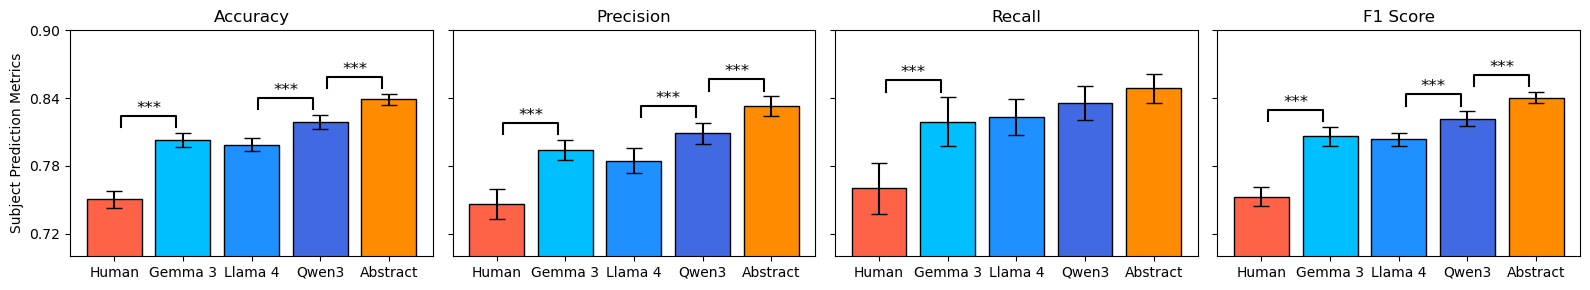

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
from pathlib import Path
home = Path.home()

metrics_group_df = pd.read_parquet(home / 'projects/TLDR/evaluation/predict_task/metrics_group_BERTopic_df.parquet')

bar_features = [
    ('annotation', 'Human', 'tomato'),
    ('gemma3', 'Gemma 3', 'deepskyblue'),
    ('llama4', 'Llama 4', 'dodgerblue'),
    ('qwen3', 'Qwen3', 'royalblue'),
    ('abstract', 'Abstract', 'darkorange'),
]
metrics = ["accuracy", "precision", "recall", "f1"]
titles = ["Accuracy", "Precision", "Recall", "F1 Score"]

fig, axes = plt.subplots(1, 4, figsize=(16, 3), sharey='row')

def add_pvalue_bar(ax, x1, x2, y, p, h=0.01):
    def p_to_star(p):
        if p < 0.001:
            return "***"
        elif p < 0.01:
            return "**"
        elif p < 0.05:
            return "*"
        else:
            return ""
    star = p_to_star(p)
    if star:
        ax.plot([x1+0.1, x1+0.1, x2-0.1, x2-0.1], [y, y+h, y+h, y], lw=1.5, c='k')
        ax.text((x1+x2)/2, y+h, star, ha='center', va='bottom', fontsize=12, color='k')

y_offset = 0.005

for col, (metric, title) in enumerate(zip(metrics, titles)):
    means = []
    stds = []
    samples = []
    colors = []
    names = []
    for k, name, color in bar_features:
        vals = metrics_group_df.loc[metrics_group_df['feature']==k, metric].values
        means.append(vals.mean())
        stds.append(vals.std())
        samples.append(vals)
        colors.append(color)
        names.append(name)

    ax = axes[col]
    bar = ax.bar(names, means, yerr=stds, capsize=6, color=colors, edgecolor='black')
    ax.set_ylim(0.7, 0.9)
    ax.set_title(f'{title}')
    if col == 0:
        ax.set_ylabel('Subject Prediction Metrics')

    for i in range(len(samples)-1):
        s1, s2 = samples[i], samples[i+1]
        stat, p = ttest_ind(s1, s2)
        x1 = i
        x2 = i+1
        y = max(means[i]+stds[i], means[i+1]+stds[i+1]) + y_offset
        add_pvalue_bar(ax, x1, x2, y, p)

# 减少yticks数量
for col in range(4):
    axes[col].yaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()

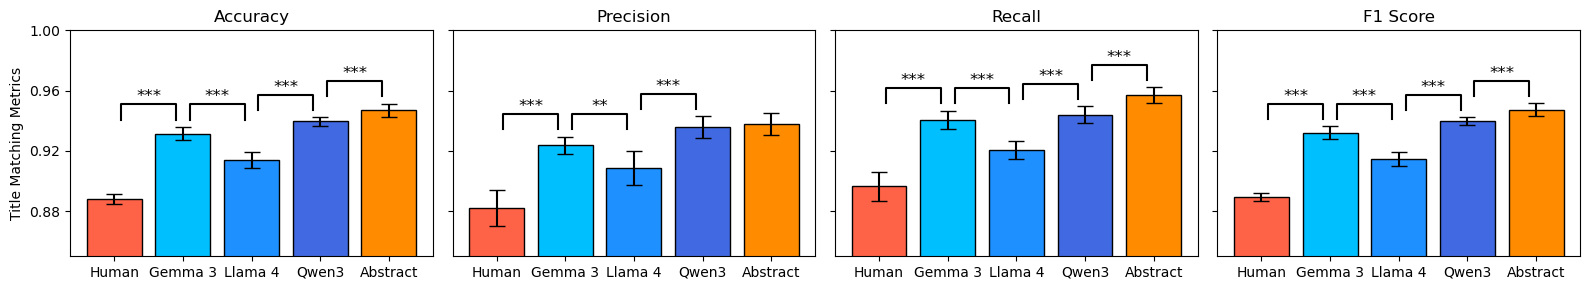

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.stats import ttest_ind
import numpy as np

metrics_title_df = pd.read_parquet(home / 'projects/TLDR/evaluation/predict_task/metrics_title_df.parquet')

bar_features = [
    ('annotation', 'Human', 'tomato'),
    ('gemma3', 'Gemma 3', 'deepskyblue'),
    ('llama4', 'Llama 4', 'dodgerblue'),
    ('qwen3', 'Qwen3', 'royalblue'),
    ('abstract', 'Abstract', 'darkorange'),
]
metrics = ["accuracy", "precision", "recall", "f1"]
titles = ["Accuracy", "Precision", "Recall", "F1 Score"]

fig, axes = plt.subplots(1, 4, figsize=(16, 3), sharey='row')

def add_pvalue_bar(ax, x1, x2, y, p, h=0.01):
    def p_to_star(p):
        if p < 0.001:
            return "***"
        elif p < 0.01:
            return "**"
        elif p < 0.05:
            return "*"
        else:
            return ""
    star = p_to_star(p)
    if star:
        ax.plot([x1+0.1, x1+0.1, x2-0.1, x2-0.1], [y, y+h, y+h, y], lw=1.5, c='k')
        ax.text((x1+x2)/2, y+h, star, ha='center', va='bottom', fontsize=12, color='k')

y_offset = 0.005

for col, (metric, title) in enumerate(zip(metrics, titles)):
    means = []
    stds = []
    samples = []
    colors = []
    names = []
    for k, name, color in bar_features:
        vals = metrics_title_df.loc[metrics_title_df['feature']==k, metric].values
        means.append(vals.mean())
        stds.append(vals.std())
        samples.append(vals)
        colors.append(color)
        names.append(name)

    ax = axes[col]
    bar = ax.bar(names, means, yerr=stds, capsize=6, color=colors, edgecolor='black')
    ax.set_ylim(0.85, 1.0)
    ax.set_title(f'{title}')
    if col == 0:
        ax.set_ylabel('Title Matching Metrics')

    for i in range(len(samples)-1):
        s1, s2 = samples[i], samples[i+1]
        stat, p = ttest_ind(s1, s2)
        x1 = i
        x2 = i+1
        y = max(means[i]+stds[i], means[i+1]+stds[i+1]) + y_offset
        add_pvalue_bar(ax, x1, x2, y, p)

# 减少yticks数量
for col in range(4):
    axes[col].yaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()

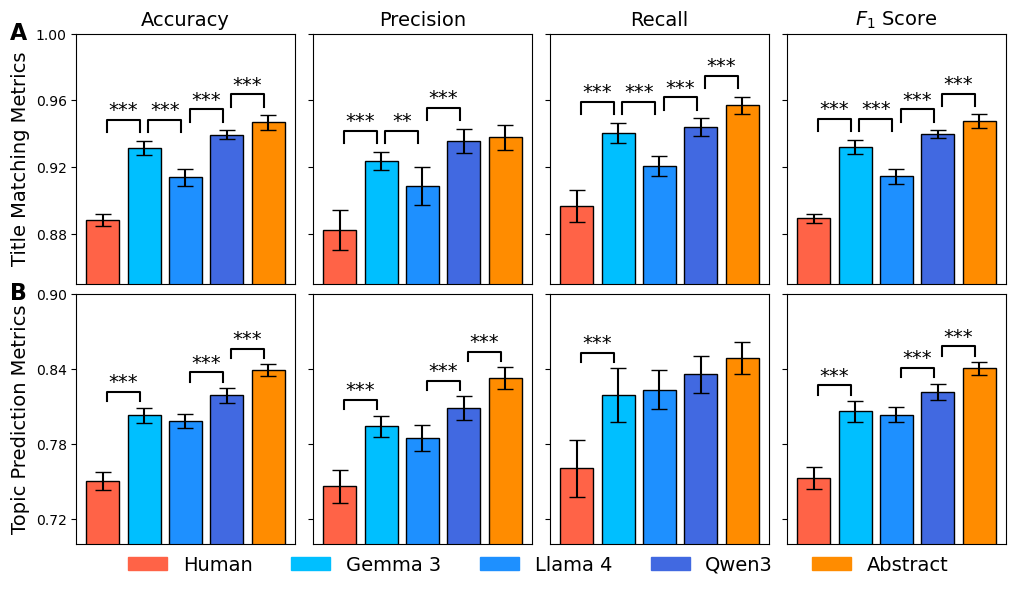

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
from scipy.stats import ttest_ind
import numpy as np

bar_features = [
    ('annotation', 'Human', 'tomato'),
    ('gemma3', 'Gemma 3', 'deepskyblue'),
    ('llama4', 'Llama 4', 'dodgerblue'),
    ('qwen3', 'Qwen3', 'royalblue'),
    ('abstract', 'Abstract', 'darkorange'),
]
metrics = ["accuracy", "precision", "recall", "f1"]
titles = ["Accuracy", "Precision", "Recall", "$F_1$ Score"]

fig, axes = plt.subplots(2, 4, figsize=(10, 6), sharey='row')

def add_pvalue_bar(ax, x1, x2, y, p, h=0.0075):
    def p_to_star(p):
        if p < 0.001:
            return "***"
        elif p < 0.01:
            return "**"
        elif p < 0.05:
            return "*"
        else:
            return ""
    star = p_to_star(p)
    if star:
        ax.plot([x1+0.1, x1+0.1, x2-0.1, x2-0.1], [y, y+h, y+h, y], lw=1.5, c='k')
        ax.text((x1+x2)/2, y+h, star, ha='center', va='bottom', fontsize=14, color='k')

y_offset = 0.005

# 1st row：metrics_title_df
for col, (metric, title) in enumerate(zip(metrics, titles)):
    means = []
    stds = []
    samples = []
    colors = []
    names = []
    for k, name, color in bar_features:
        vals = metrics_title_df.loc[metrics_title_df['feature']==k, metric].values
        means.append(vals.mean())
        stds.append(vals.std())
        samples.append(vals)
        colors.append(color)
        names.append(name)

    ax = axes[0, col]
    bar = ax.bar(names, means, yerr=stds, capsize=6, color=colors, edgecolor='black')
    if col == 0:
        ax.set_ylabel('Title Matching Metrics', fontsize=14)
        ax.text(-0.225, 1.05, 'A', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax.set_ylim(0.85, 1.0)
    ax.set_title(f'{title}', fontsize=14)
    ax.set_xticks([])

    for i in range(len(samples)-1):
        s1, s2 = samples[i], samples[i+1]
        stat, p = ttest_ind(s1, s2)
        x1 = i
        x2 = i+1
        y = max(means[i]+stds[i], means[i+1]+stds[i+1]) + y_offset
        add_pvalue_bar(ax, x1, x2, y, p)

# 2rd row：metrics_sub_df
for col, (metric, title) in enumerate(zip(metrics, titles)):
    means = []
    stds = []
    samples = []
    colors = []
    names = []
    for k, name, color in bar_features:
        vals = metrics_group_df.loc[metrics_group_df['feature']==k, metric].values
        means.append(vals.mean())
        stds.append(vals.std())
        samples.append(vals)
        colors.append(color)
        names.append(name)

    ax = axes[1, col]
    bar = ax.bar(names, means, yerr=stds, capsize=6, color=colors, edgecolor='black')
    if col == 0:
        ax.set_ylabel('Topic Prediction Metrics', fontsize=14)
        ax.text(-0.225, 1.05, 'B', transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')
    ax.set_ylim(0.7, 0.9)
    ax.set_xticks([])

    for i in range(len(samples)-1):
        s1, s2 = samples[i], samples[i+1]
        stat, p = ttest_ind(s1, s2)
        x1 = i
        x2 = i+1
        y = max(means[i]+stds[i], means[i+1]+stds[i+1]) + y_offset
        add_pvalue_bar(ax, x1, x2, y, p)

# limit the number of yticks
for row in range(2):
    for col in range(4):
        axes[row, col].yaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout(pad=0.2, w_pad=1, h_pad=0,
                 rect=[0, 0.1, 1, 1])  # save space to place legend

# 构建 legend 句柄
legend_handles = [
    mpatches.Patch(color=color, label=name)
    for _, name, color in bar_features
]
plt.figlegend(
    handles=legend_handles,
    loc="lower center",
    ncol=len(bar_features),
    bbox_to_anchor=(0.53, 0.025),
    frameon=False,
    fontsize=14
)

plt.show()

In [27]:
fig.savefig(home / 'projects/TLDR/evaluation/predict_task/prediction_performance.pdf', dpi=300, bbox_inches='tight')